[View in Colaboratory](https://colab.research.google.com/github/windpuppy/tensorflow/blob/master/basic_classification.ipynb)

Epoch 1/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.4925 - acc: 0.8260
Epoch 2/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.3710 - acc: 0.8661
Epoch 3/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3352 - acc: 0.8755
Epoch 4/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.3125 - acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step
Test loss tr: 0.26979497221410276
Test accuracy tr: 0.9009333333333334
10000/10000 [==============================] - 0s 49us/step
Test loss: 0.344764339196682
Test accuracy: 0.8781
[[4.2861684e-05 7.0254652e-07 3.6918857e-07 7.8605274e-07 6.0356674e-06
  1.3091320e-02 3.9467004e-06 1.0206312e-01 2.7149174e-05 8.8476378e-01]]


9

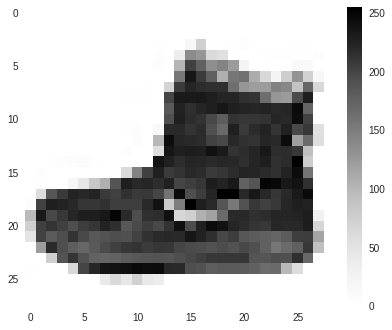

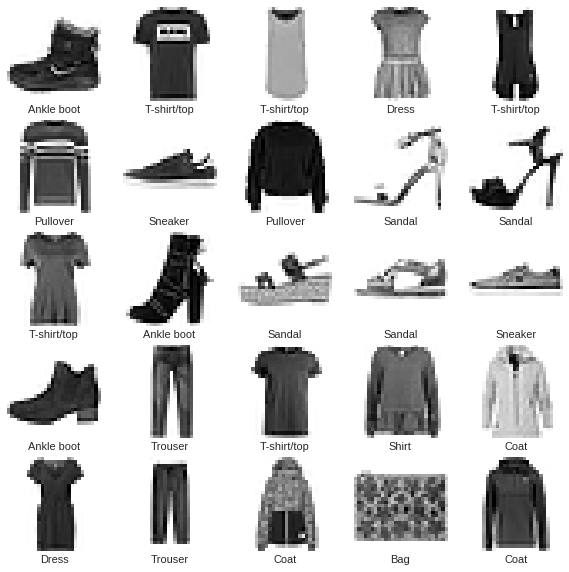

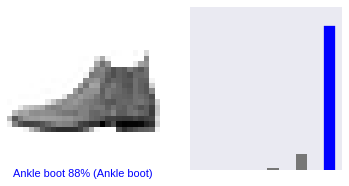

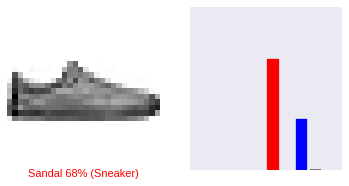

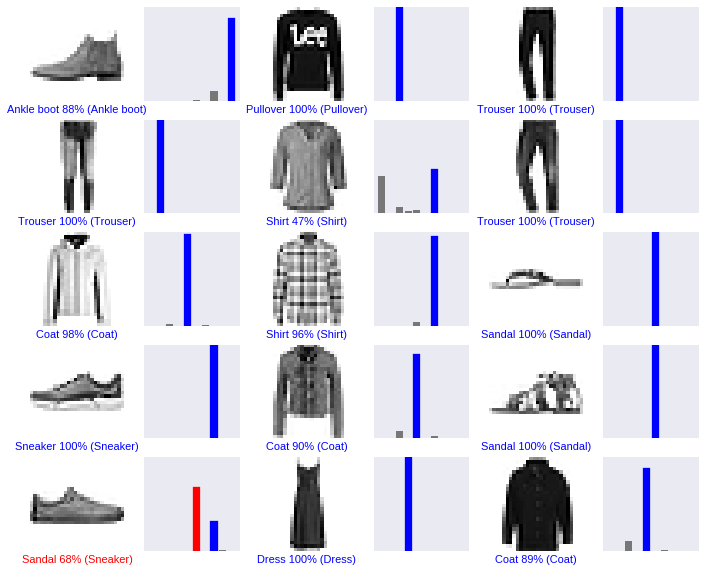

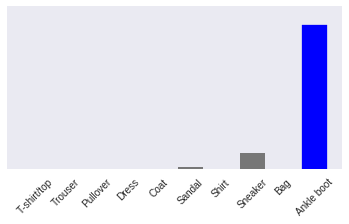

In [18]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#print(tf.__version__)



# Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

'''
print(train_images.shape) #60000, 28, 28
print(len(train_labels))  #60000
print(test_images.shape)  #10000, 28, 28
print(len(test_labels))   #10000
'''
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Peek the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

# Normalize image from 0-255 to 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Peek again
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
# Setup layers (1 flatten, 2 dense layers)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup optimizer, loss function, metrics
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Test the model - first on training data
test_losstr, test_acctr = model.evaluate(train_images, train_labels)
print('Test loss tr:', test_losstr)
print('Test accuracy tr:', test_acctr)

# Test the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Start predction
predictions = model.predict(test_images) # e.g. predictions[0] is an array of 10 elements with confidence values for each of the 10 categories




def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
  
# 0th image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

# 12th image
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
  
  
  
# Predict a single image
img = test_images[0]
#print(img.shape)
img = (np.expand_dims(img,0))
#print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)

# Print result
plt.figure(figsize=(6,3))
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])
